In [1]:
import logging
import numpy as np
import pandas as pd
root = logging.getLogger()
root.addHandler(logging.StreamHandler())
%matplotlib inline

In [2]:
# download http://bit.ly/1R8pt20 (zipped Turtles shapefiles), and unzip them
# or download from Google Drive: https://drive.google.com/open?id=0B9cazFzBtPuCSFp3YWE1V2JGdnc
from iSDM.species import IUCNSpecies
fish = IUCNSpecies(name_species='All')
fish.load_shapefile('../data/fish/FW_FISH.shp') # warning, 2GB of data will be loaded, may take a while!!

Enabled Shapely speedups for performance.
Loading data from: ../data/fish/FW_FISH.shp
The shapefile contains data on 12927 species areas.


## Simple data exploration

In [3]:
fish.get_data().columns

Index(['binomial', 'category', 'citation', 'class_name', 'compiler',
       'dist_comm', 'family_nam', 'genus_name', 'geometry', 'id_no', 'island',
       'kingdom_na', 'legend', 'order_name', 'origin', 'phylum_nam',
       'presence', 'seasonal', 'shape_area', 'shape_leng', 'source',
       'species_na', 'subpop', 'subspecies', 'tax_comm', 'year'],
      dtype='object')

How many unique binomials are there?

In [4]:
fish_data = fish.get_data()
fish_data['binomial'].unique().size 

6328

Get their names in an array:

In [5]:
unique_binomials = fish_data['binomial'].unique()
unique_binomials

array(['Bagarius suchus', 'Rasbora spilocerca', 'Notoglanidium pallidum',
       ..., 'Schistura procera', 'Monotrete cambodgiensis',
       'Acantopsis spectabilis'], dtype=object)

In [6]:
fish_data.head(10) # peak at the first 10 records

,binomial,category,citation,class_name,compiler,dist_comm,family_nam,genus_name,geometry,id_no,...,presence,seasonal,shape_area,shape_leng,source,species_na,subpop,subspecies,tax_comm,year
0,Bagarius suchus,NT,"Indo-Burma freshwater assessment, IUCN",ACTINOPTERYGII,IUCN FBU,None,SISORIDAE,Bagarius,"POLYGON ((101.8125000000001 22.48333333300008,...",181271.0,...,2.0,5.0,49.374794,60.288418,Red List assessment,suchus,None,None,None,2012.0
1,Rasbora spilocerca,LC,"Indo-Burma freshwater assessment, IUCN",ACTINOPTERYGII,"J. Scott, IUCN",None,CYPRINIDAE,Rasbora,"POLYGON ((103.5121466740001 18.53992445200004,...",181127.0,...,2.0,5.0,8.361239,58.345301,Red List assessment,spilocerca,None,None,None,2012.0
2,Notoglanidium pallidum,VU,IUCN (International Union for Conservation of ...,ACTINOPTERYGII,None,None,CLAROTEIDAE,Notoglanidium,POLYGON ((12.81128506100004 -4.286932711999953...,182359.0,...,1.0,1.0,1.524058,10.000992,None,pallidum,None,None,None,0.0
3,Parananochromis brevirostris,VU,IUCN (International Union for Conservation of ...,ACTINOPTERYGII,None,None,CICHLIDAE,Parananochromis,(POLYGON ((12.10738288000005 1.628413222000063...,182240.0,...,2.0,1.0,5.563441,30.269691,None,brevirostris,None,None,None,0.0
4,Parananochromis brevirostris,VU,IUCN (International Union for Conservation of ...,ACTINOPTERYGII,None,None,CICHLIDAE,Parananochromis,(POLYGON ((12.78953162300007 2.117309570000032...,182240.0,...,1.0,1.0,4.872947,39.634665,None,brevirostris,None,None,None,0.0
5,Parananochromis brevirostris,VU,None,ACTINOPTERYGII,None,None,CICHLIDAE,Parananochromis,(POLYGON ((13.13924221400003 -0.98298000799997...,182240.0,...,1.0,1.0,0.366030,6.770438,None,brevirostris,None,None,None,0.0
6,Ambassis vachellii,LC,H.Larson and IUCN (International Union for Con...,ACTINOPTERYGII,M.Raiwalui/IUCN,None,AMBASSIDAE,Ambassis,"(POLYGON ((105.2625 -6.754166666999936, 105.25...",166893.0,...,1.0,1.0,121.742461,1817.507950,H.Larson,vachellii,None,None,None,2011.0
7,Parasikukia maculata,LC,"Indo-Burma freshwater assessment, IUCN",ACTINOPTERYGII,"D. Allen, IUCN",None,CYPRINIDAE,Parasikukia,"(POLYGON ((100.374432712 18.59657999700005, 10...",181017.0,...,2.0,1.0,12.017594,58.052434,Red List assessment,maculata,None,None,None,2012.0
8,Parasikukia maculata,LC,"Indo-Burma freshwater assessment, IUCN",ACTINOPTERYGII,"D. Allen, IUCN",None,CYPRINIDAE,Parasikukia,(POLYGON ((100.8458333330001 12.69166666700005...,181017.0,...,2.0,1.0,4.081329,37.348873,C. Vidthayanon pers. comm. 2011,maculata,None,None,None,2012.0
9,Parasikukia maculata,LC,"Indo-Burma freshwater assessment, IUCN",ACTINOPTERYGII,IUCN FBU,None,CYPRINIDAE,Parasikukia,(POLYGON ((99.65793745300005 16.53653225300008...,181017.0,...,2.0,5.0,0.374677,6.355700,Red List assessment,maculata,None,None,None,2012.0


Sort them by their "shape_area" column, to get the biggest and smallest areas

In [7]:
fish_data.sort(columns='shape_area', inplace=True)

/home/daniela/anaconda/envs/biodiversity_py3/lib/python3.4/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


Peak at the first 5 records with the smallest area

In [8]:
fish_data.head(5)

,binomial,category,citation,class_name,compiler,dist_comm,family_nam,genus_name,geometry,id_no,...,presence,seasonal,shape_area,shape_leng,source,species_na,subpop,subspecies,tax_comm,year
1396,Astatotilapia burtoni,LC,IUCN (International Union for Conservation of ...,ACTINOPTERYGII,None,None,CICHLIDAE,Astatotilapia,POLYGON ((29.81538226200007 -5.175785492999978...,60462.0,...,1.0,0.0,0.000122,0.060842,None,burtoni,None,None,None,0.0
6610,Channa striata,LC,"Chaudhry S., 2009",ACTINOPTERYGII,Shivaji Chaudhry,None,CHANNIDAE,Channa,"POLYGON ((121.2046038030001 14.44001242700006,...",166563.0,...,1.0,4.0,0.000242,0.073176,CAS 204572,striata,None,None,None,2007.0
6889,Rasbora rasbora,LC,IUCN,ACTINOPTERYGII,W. Vishwanath,None,CYPRINIDAE,Rasbora,"POLYGON ((97.65833333300009 16.53333333300003,...",166440.0,...,1.0,1.0,0.000286,0.075311,"Fishbase, 2026",rasbora,None,None,None,2007.0
11988,Puntius chola,LC,"Dahanukar, N.",ACTINOPTERYGII,"Dahanukar, N.",None,CYPRINIDAE,Puntius,"POLYGON ((97.65833333300009 16.53333333300003,...",166443.0,...,1.0,1.0,0.000286,0.075311,"accessed through GBIF data portal, NRM-Fishes,...",chola,None,None,None,2007.0
5382,Pisodonophis boro,LC,"Chaudhry S., 2009",ACTINOPTERYGII,Shivaji Chaudhry,None,OPHICHTHIDAE,Pisodonophis,"POLYGON ((85.46407583500007 19.66257255000005,...",166552.0,...,1.0,4.0,0.000393,0.101212,FISH 387621,boro,None,None,None,2007.0


The last 5 records (biggest area)

In [9]:
fish_data.tail(5)

,binomial,category,citation,class_name,compiler,dist_comm,family_nam,genus_name,geometry,id_no,...,presence,seasonal,shape_area,shape_leng,source,species_na,subpop,subspecies,tax_comm,year
10436,Rutilus rutilus,LC,None,ACTINOPTERYGII,None,None,CYPRINIDAE,Rutilus,(POLYGON ((-4.770833332999928 48.5250000000000...,19787.0,...,1.0,1.0,2987.465593,1978.210580,None,rutilus,None,None,None,0.0
271,Cottus confusus,LC,"Freshwater Biodiversity Unit, IUCN",ACTINOPTERYGII,"Phillipa Palmeirin, FBU, IUCN",None,COTTIDAE,Cottus,"(POLYGON ((-167.666666666 65.79166666700007, -...",202659.0,...,2.0,1.0,3031.001694,5133.731779,"Page, L.M. and Burr, B.M. 2011. Peterson Field...",confusus,None,None,None,2012.0
4886,Perca fluviatilis,LC,None,ACTINOPTERYGII,None,None,PERCIDAE,Perca,(POLYGON ((-4.770833332999928 48.5250000000000...,16580.0,...,1.0,1.0,3365.103170,2218.467787,None,fluviatilis,None,None,None,0.0
5973,Lota lota,LC,None,ACTINOPTERYGII,None,None,LOTIDAE,Lota,(POLYGON ((4.038374837000049 51.96308458100003...,135675.0,...,1.0,1.0,4264.651654,4250.283811,None,lota,None,None,None,0.0
10370,Esox lucius,LC,None,ACTINOPTERYGII,None,None,ESOCIDAE,Esox,(POLYGON ((-4.770833332999928 48.5250000000000...,135631.0,...,1.0,1.0,5225.451235,4405.111110,None,lucius,None,None,None,0.0


Decision: **"We will include all species except those that are completely extinct. For the (possibly) extant species, we will include their entire range (including polygons from which they are currently extinct) in order to cover their full potential distribution."**

From IUCN, these are the codes for presence:
1. Extant
2. Probably extant
3. Possibly extant
4. Possibly extinct
5. Extinct
6. Presence uncertain

Are there species for which the presence category isn't any of the above? (the "~" is negation, so this below says "select all fish data, for which the "presence" column is NOT in [1,2,3,4,5,6])

In [10]:
fish_data[~fish_data.presence.isin([1,2,3,4,5,6])]

,binomial,category,citation,class_name,compiler,dist_comm,family_nam,genus_name,geometry,id_no,...,presence,seasonal,shape_area,shape_leng,source,species_na,subpop,subspecies,tax_comm,year
3269,Acipenser fulvescens,LC,"Freshwater Biodiversity Unit, IUCN",ACTINOPTERYGII,IUCN,None,ACIPENSERIDAE,Acipenser,(POLYGON ((-77.20221048999997 44.0297339540000...,223.0,...,0.0,0.0,0.061229,5.069857,"Page and Burr, 1991",fulvescens,None,None,None,2013.0
2312,Sicyopterus sarasini,EN,None,ACTINOPTERYGII,None,None,GOBIIDAE,Sicyopterus,(POLYGON ((165.0041666660001 -21.3374999999999...,196370.0,...,0.0,0.0,0.299701,4.962775,None,sarasini,None,None,None,0.0
4669,Chanodichthys erythropterus,LC,None,ACTINOPTERYGII,None,None,CYPRINIDAE,Chanodichthys,"(POLYGON ((117.40221049 48.42859937900005, 117...",166143.0,...,0.0,0.0,0.822562,12.134009,None,erythropterus,None,None,None,0.0
11591,Hemiculter leucisculus,LC,None,ACTINOPTERYGII,None,None,CYPRINIDAE,Hemiculter,"POLYGON ((117.83971049 48.88693271300008, 117....",166193.0,...,0.0,0.0,2.336222,13.899461,None,leucisculus,None,None,None,0.0
3292,Microphysogobio tungtingensis,NT,None,ACTINOPTERYGII,None,None,CYPRINIDAE,Microphysogobio,"POLYGON ((117.83971049 48.88693271300008, 117....",166028.0,...,0.0,0.0,2.629233,16.648915,None,tungtingensis,None,None,None,0.0
12321,Carassius carassius,LC,None,ACTINOPTERYGII,None,None,CYPRINIDAE,Carassius,"POLYGON ((91.22674221500006 48.04201999200006,...",3849.0,...,0.0,0.0,4.347034,15.390500,None,carassius,None,None,None,0.0
10823,Tinca tinca,LC,None,ACTINOPTERYGII,None,None,CYPRINIDAE,Tinca,"POLYGON ((91.22674221500006 48.04201999200006,...",21912.0,...,0.0,0.0,4.347034,15.390500,None,tinca,None,None,None,0.0
1911,Rhynchocypris czekanowskii,LC,None,ACTINOPTERYGII,None,None,CYPRINIDAE,Rhynchocypris,(POLYGON ((109.5313771560001 50.52026604500003...,135492.0,...,0.0,0.0,4.664014,32.817185,None,czekanowskii,None,None,None,0.0
6126,Chanodichthys mongolicus,LC,None,ACTINOPTERYGII,None,None,CYPRINIDAE,Chanodichthys,"POLYGON ((113.3871466740001 51.08159111800006,...",180698.0,...,0.0,0.0,4.793526,23.142232,None,mongolicus,None,None,None,0.0
1054,Acipenser baerii,EN,None,ACTINOPTERYGII,None,None,ACIPENSERIDAE,Acipenser,"POLYGON ((106.493408882 50.40868665900007, 106...",244.0,...,0.0,0.0,5.865542,22.969322,None,baerii,None,None,None,0.0


Apparently there are 28 species for which the "presence" is set to 0 in some regions. Their binomials are:

In [11]:
fish_data[~fish_data.presence.isin([1,2,3,4,5,6])]['binomial']

3269              Acipenser fulvescens
2312              Sicyopterus sarasini
4669       Chanodichthys erythropterus
11591           Hemiculter leucisculus
3292     Microphysogobio tungtingensis
12321              Carassius carassius
10823                      Tinca tinca
1911        Rhynchocypris czekanowskii
6126          Chanodichthys mongolicus
1054                  Acipenser baerii
1139               Coregonus pidschian
3270              Acipenser fulvescens
2349               Agosia chrysogaster
10621                   Leuciscus idus
10718             Coregonus autumnalis
9931              Cyprinus rubrofuscus
12919                 Rhodeus sericeus
10367                      Esox lucius
9015        Misgurnus anguillicaudatus
8574                    Silurus asotus
4163               Pseudorasbora parva
4887                 Perca fluviatilis
1086               Cobitis melanoleuca
9419           Rhynchocypris percnurus
10525               Thymallus arcticus
5967                     

Actually it's 26, since "Acipenser fulvescens" has 3 separate records (polygons)

"For the (possibly) extant species, we will include their entire range (including polygons from which they are 
currently extinct)"

As an example, here is a species with both extant and extinct areas

In [12]:
fish_data[fish_data.binomial=='Acantharchus pomotis']

,binomial,category,citation,class_name,compiler,dist_comm,family_nam,genus_name,geometry,id_no,...,presence,seasonal,shape_area,shape_leng,source,species_na,subpop,subspecies,tax_comm,year
2154,Acantharchus pomotis,LC,NatureServe,ACTINOPTERYGII,"Freshwater Biodiversity Unit, IUCN",None,CENTRARCHIDAE,Acantharchus,POLYGON ((-83.63333333299994 31.23750000000007...,201938.0,...,5.0,0.0,0.024246,0.796963,Digital Distribution Maps of the Freshwater Fi...,pomotis,None,None,None,2013.0
2156,Acantharchus pomotis,LC,None,ACTINOPTERYGII,None,None,CENTRARCHIDAE,Acantharchus,(POLYGON ((-83.94131181499995 32.4517130540000...,201938.0,...,1.0,0.0,2.006039,18.544973,None,pomotis,None,None,None,0.0
2155,Acantharchus pomotis,LC,NatureServe,ACTINOPTERYGII,"Freshwater Biodiversity Unit, IUCN",None,CENTRARCHIDAE,Acantharchus,(POLYGON ((-84.33333333299998 30.0500000000000...,201938.0,...,1.0,0.0,25.110455,170.717198,Digital Distribution Maps of the Freshwater Fi...,pomotis,None,None,None,2013.0


Plenty of columns, let's just select the 'binomial', 'presence', 'geometry', and 'shape_area' to have a clearer overview

In [13]:
fish_data[fish_data.binomial=='Acantharchus pomotis'][['binomial','presence', 'geometry','shape_area']]

,binomial,presence,geometry,shape_area
2154,Acantharchus pomotis,5.0,POLYGON ((-83.63333333299994 31.23750000000007...,0.024246
2156,Acantharchus pomotis,1.0,(POLYGON ((-83.94131181499995 32.4517130540000...,2.006039
2155,Acantharchus pomotis,1.0,(POLYGON ((-84.33333333299998 30.0500000000000...,25.110455


As agreed, we want to keep the first (extinct==5) polygon when there are other regions (the next two records) where the species is not extinct. There is a function that can do the filtering out in a simple way.

In [14]:
fish.drop_extinct_species()

There are currently 6328 unique species. 

Filtering out the following extinct species: ['Alburnus akili', 'Alburnus nicaeensis', 'Aphanius splendens', "Aplocheilichthys sp. nov. 'Naivasha'", 'Barbus microbarbis', 'Catostomus bernardini', 'Chasmistes muriei', 'Coregonus bezola', 'Coregonus fera', 'Coregonus gutturosus', 'Coregonus hiemalis', 'Coregonus johannae', 'Coregonus oxyrinchus', 'Coregonus restrictus', 'Cottus bendirei', 'Cottus echinatus', 'Cyprinodon arcuatus', 'Cyprinus micristius', 'Empetrichthys latos', 'Empetrichthys merriami', "Eudontomyzon sp. nov. 'migratory'", 'Fundulus albolineatus', 'Gambusia amistadensis', 'Gambusia georgei', 'Gambusia senilis', 'Gasterosteus crenobiontus', 'Gila crassicauda', 'Ictalurus pricei', 'Lepidomeda altivelis', 'Mirogrex hulensis', 'Moxostoma lacerum', 'Noturus trautmani', 'Pantanodon madagascariensis', 'Platytropius siamensis', 'Pogonichthys ciscoides', 'Prototroctes oxyrhynchus', 'Ptychochromis onilahy', 'Ptychochromoides itasy', 'Rhinic

In [15]:
fish.save_data("../data/fish/selection/non_extinct.pkl", method="pickle")

Saved data: ../data/fish/selection/non_extinct.pkl 
Type of data: <class 'geopandas.geodataframe.GeoDataFrame'> 


In [16]:
non_extinct_fish = fish.get_data()

### Cross-check with GBIF records

#### How many freshwater fish observation records do we have (without any filtering)


In [17]:
total_records = 0
# download the file "merged.msg" from here: (My Google Drive)
# https://drive.google.com/open?id=0B9cazFzBtPuCTHcyTmVXV0pNT0k
# and place it the subfolder "selection"
# The "merged.msg" file contains all datagrames for all individual species.
for df in pd.read_msgpack("../data/fish/selection/merged.msg", iterator=True):
    total_records += df.shape[0]    

In [18]:
total_records

4733792

#### 1. Problematic/unavailable locality
Which species have **no latitude/longitude information, and how many "observations" are there for them?** What is the basis of record for such species? (Suspicion is that these are old museum/journals records)

In [19]:
important_columns = ['species', 'dateidentified','basisofrecord', 'verbatimlocality', 'day', 'month', 'year' ]
result_no_lat_long = pd.DataFrame(columns=important_columns)

for df in pd.read_msgpack("../data/fish/selection/merged.msg", iterator=True):
    if "decimallatitude" not in df.columns.tolist() or "decimallongitude" not in df.columns.tolist():
        common_columns = list(set(important_columns).intersection(set(df.columns.tolist())))
        result_no_lat_long = result_no_lat_long.append(df[common_columns], ignore_index=True)
      

#### How many unique species are there, without lat/lon?

In [20]:
result_no_lat_long['species'].unique().size

600

Warning: this does not mean that the species ONLY has such records. It could be that particular species also has records WITH latitude/longitude information.

##### So then what percentage of the total number of records?

In [21]:
(result_no_lat_long.shape[0]/total_records) * 100 # not that bad, only about 0.2%

0.16261804489931117

#### What about verbatim locality? Is that helpful? These records have a verbatim locality

In [22]:
result_no_lat_long[['species', 'verbatimlocality']][result_no_lat_long.verbatimlocality.notnull()]

,species,verbatimlocality
27,Salmo stomachicus,; ; ; ; ; ; ;
42,Clypeobarbus bellcrossi,Africa | Zambia | Western Province
114,Squalidus atromaculatus,Hainan
869,Salvelinus perisii,; ; ; ; ; ; ;
1285,Barbus fritschii,Berkana
1290,Barbus fritschii,Oued Tensift
1292,Barbus fritschii,Oued Za
1293,Barbus fritschii,Ras-el-Ain
1341,Hara horai,unspecified
1367,Barbus callensis,Oued Tensift


How many records with verbatim locality?

In [23]:
result_no_lat_long[['species', 'verbatimlocality']][result_no_lat_long.verbatimlocality.notnull()].shape[0]

52

#### If we group them by the basisofrecord, how many?

In [24]:
grouped_no_lat_lon = pd.DataFrame()
grouped_no_lat_lon['count'] = result_no_lat_long.groupby(['species', 'basisofrecord']).apply(lambda x: x['basisofrecord'].count())
grouped_no_lat_lon.head(30)

,,count
species,basisofrecord,
Abactochromis labrosus,PRESERVED_SPECIMEN,6
Acanthobrama microlepis,PRESERVED_SPECIMEN,12
Acanthocobitis pavonacea,PRESERVED_SPECIMEN,1
Acentrogobius therezieni,PRESERVED_SPECIMEN,9
Acheilognathus deignani,PRESERVED_SPECIMEN,2
Acheilognathus meridianus,PRESERVED_SPECIMEN,1
Acrochordonichthys gyrinus,PRESERVED_SPECIMEN,2
Acrossocheilus microstoma,PRESERVED_SPECIMEN,1
Ailiichthys punctata,PRESERVED_SPECIMEN,4


#### Which ones have at least 50 records (more likely we need at least 100 records in total per species, but let's keep the bar low still)

In [25]:
grouped_no_lat_lon[grouped_no_lat_lon['count']>50]

,,count
species,basisofrecord,
Aphyosemion mimbon,PRESERVED_SPECIMEN,61
Barbus callensis,PRESERVED_SPECIMEN,122
Barbus ciscaucasicus,PRESERVED_SPECIMEN,673
Barbus fritschii,PRESERVED_SPECIMEN,95
Barbus petenyi,PRESERVED_SPECIMEN,553
Chondrostoma oxyrhynchum,PRESERVED_SPECIMEN,72
Cobitis stephanidisi,PRESERVED_SPECIMEN,62
Coregonus nilssoni,PRESERVED_SPECIMEN,59
Distichodus nefasch,PRESERVED_SPECIMEN,54


According to http://gbif.github.io/gbif-api/apidocs/org/gbif/api/vocabulary/BasisOfRecord.html
these are different from "real" human observations. But I'm not sure what PRESERVED_SPECIMEN is exactly?

#### What about the year in which these observations have been recorded? For those after 1960... (note that not all records have a year or any date information)

In [26]:
result_no_lat_long_years = result_no_lat_long[['species','year']][result_no_lat_long.year > 1960].groupby('species')['year'].apply(lambda x:x.tolist())
pd.DataFrame(result_no_lat_long_years).head(30)

,year
species,
Acanthobrama microlepis,"[2006.0, 2006.0, 1966.0, 1966.0, 1966.0]"
Acentrogobius therezieni,"[1963.0, 1963.0, 1963.0]"
Acrochordonichthys gyrinus,"[1995.0, 1995.0]"
Alburnoides eichwaldii,"[2006.0, 2006.0, 2006.0, 2006.0, 2006.0]"
Alburnoides fasciatus,"[2010.0, 2010.0, 2007.0, 2007.0, 2007.0, 2006...."
Alburnoides gmelini,"[2004.0, 2004.0, 2004.0, 2004.0]"
Alburnoides rossicus,"[2012.0, 2012.0, 2012.0, 2012.0]"
Alburnus escherichii,"[2006.0, 2006.0, 1990.0, 1990.0]"
Alburnus filippii,"[2012.0, 2010.0, 2006.0]"


In [92]:
pd.DataFrame(result_no_lat_long_years).shape[0]

228

228 unique species with records after 1960, but no useful locality info about them anyways. I think all records without lat/lon will need to be discarded, for the 600 species.

Further selection criteria...

#### 2. Records with latitude/longitude: how many? how many with year>1960? year>1990? Without any date? accuracy of location?
warning: below takes long to run

In [27]:
import pandas as pd
important_columns1 = ['species', 'dateidentified', 'eventdate', 'basisofrecord', 'decimallatitude','decimallongitude', 'day', 'month', 'year' ]
result_with_lat_long = pd.DataFrame(columns=important_columns1)
counter = 0
for df in pd.read_msgpack("../data/fish/selection/merged.msg", iterator=True):
    counter += 1
    if (counter%100==0):
        print("Processing.. ", counter)
    if "decimallatitude" in df.columns.tolist() and "decimallongitude" in df.columns.tolist():
        common_columns = list(set(important_columns1).intersection(set(df.columns.tolist())))
        result_with_lat_long = result_with_lat_long.append(df[common_columns], ignore_index=True)
      

Processing..  100
Processing..  200
Processing..  300
Processing..  400
Processing..  500
Processing..  600
Processing..  700
Processing..  800
Processing..  900
Processing..  1000
Processing..  1100
Processing..  1200
Processing..  1300
Processing..  1400
Processing..  1500
Processing..  1600
Processing..  1700
Processing..  1800
Processing..  1900
Processing..  2000
Processing..  2100
Processing..  2200
Processing..  2300
Processing..  2400
Processing..  2500
Processing..  2600
Processing..  2700
Processing..  2800
Processing..  2900
Processing..  3000
Processing..  3100
Processing..  3200
Processing..  3300
Processing..  3400
Processing..  3500
Processing..  3600
Processing..  3700
Processing..  3800
Processing..  3900
Processing..  4000
Processing..  4100
Processing..  4200
Processing..  4300
Processing..  4400
Processing..  4500
Processing..  4600
Processing..  4700
Processing..  4800
Processing..  4900
Processing..  5000
Processing..  5100
Processing..  5200
Processing..  5300
Pr

In [28]:
result_with_lat_long = result_with_lat_long[result_with_lat_long.decimallatitude.notnull() & result_with_lat_long.decimallongitude.notnull()]

In [29]:
result_with_lat_long.shape[0] # this-many occurrence records

3827182

In [30]:
result_with_lat_long.shape[0]/ total_records * 100 # percentage of records out of *ALL* species records

80.84812344944604

### How many unique species have occurrence records with latitude/longitude?

In [31]:
result_with_lat_long['species'].unique().size

5242

### What percentage of the occurrence records HAVE latitude/longitude, but NO event date?

In [32]:
result_with_lat_long_no_date = result_with_lat_long[(result_with_lat_long.eventdate.isnull()) & (result_with_lat_long.year.isnull())]

In [33]:
result_with_lat_long_no_date.shape[0]/result_with_lat_long.shape[0] * 100 # 12% 

11.751805897916535

Best to take into account all observations which have either "year" or "eventdate" present. (or both)
Let's group them by species name, and count the number of observation records.

In [34]:
grouped_lat_long_year_or_eventdate = pd.DataFrame()
grouped_lat_long_year_or_eventdate['count'] = result_with_lat_long[result_with_lat_long.eventdate.notnull() | result_with_lat_long.year.notnull()].groupby(['species']).apply(lambda x: x['species'].count())
grouped_lat_long_year_or_eventdate.head(10) # peak at the top 10 only

,count
species,
Aaptosyax grypus,2
Aborichthys elongatus,1
Abramis brama,114212
Acantharchus pomotis,477
Acanthobrama centisquama,1
Acanthobrama lissneri,58
Acanthobrama marmid,18
Acanthobrama telavivensis,39
Acanthobrama terraesanctae,11


Notice that some of them have very few observations. We will filter them out later.
### How many unique species HAVE records with latitude/longitude, AND date of event (at least year)

In [35]:
grouped_lat_long_year_or_eventdate.shape[0]

4847

#### What percentage of observations is that?

In [36]:
100 * result_with_lat_long[result_with_lat_long.eventdate.notnull() | result_with_lat_long.year.notnull()].shape[0] / result_with_lat_long.shape[0]

88.24819410208346

### How many unique species with latitude/longitude, AND event date after 1960?

In [37]:
year_or_eventdate_1960 = result_with_lat_long[['species', 'year', 'eventdate']][(result_with_lat_long.year>1960) | (result_with_lat_long.eventdate>"1960")]

grouped_year_or_eventdate_1960 = pd.DataFrame()
grouped_year_or_eventdate_1960['numobservations'] = year_or_eventdate_1960.groupby(['species']).apply(lambda x: x['species'].count())
grouped_year_or_eventdate_1960.shape[0]

4613

#### What percentage of observations is that?  (out of all records with latitude/longitude)?

In [38]:
year_or_eventdate_1960.shape[0]/result_with_lat_long.shape[0] * 100

83.01737414107822

### From these above, how many species have 50+ observations?

In [39]:
grouped_year_or_eventdate_1960[grouped_year_or_eventdate_1960.numobservations>=50]

,numobservations
species,
Abramis brama,113700
Acantharchus pomotis,463
Acanthogobius flavimanus,662
Acheilognathus macropterus,94
Achondrostoma arcasii,3113
Acipenser brevirostrum,121
Acipenser fulvescens,169
Acipenser oxyrinchus,278
Acipenser sturio,67


Not that many. 1283 species.

#### What percentage is that (out of all records with latitude/longitude)?

In [40]:
(grouped_year_or_eventdate_1960[grouped_year_or_eventdate_1960.numobservations>50].numobservations.sum() / result_with_lat_long.shape[0]) * 100

81.828823400611725

So 80% of all records with latitude and longitude, **are** with year>1960 **and** more than 50 occurrences per species.
But  **note that this still covers only 1281 uniqute species (out of 6280 that we started with) **

#### What percentage is that (out of all records with latitude/longitude AND year>1960)?

In [41]:
100 * grouped_year_or_eventdate_1960[grouped_year_or_eventdate_1960.numobservations>50].numobservations.sum() / grouped_year_or_eventdate_1960.numobservations.sum()

98.724201337301551

Ok that means most (98%) species with latitude/longitude after year 1960, **have** more than 50 records.

### If we limit to records >1990, it becomes even more worrying.

In [42]:
year_or_eventdate_1990 = result_with_lat_long[['species', 'year', 'eventdate', 'basisofrecord']][(result_with_lat_long.year>=1990) | (result_with_lat_long.eventdate>="1990")]

grouped_year_or_eventdate_1990 = pd.DataFrame()
grouped_year_or_eventdate_1990['numobservations'] = year_or_eventdate_1990.groupby(['species']).apply(lambda x: x['species'].count())
grouped_year_or_eventdate_1990.shape[0] # number of unique species

4037

#### What percentage of observations is that?  (out of all records with latitude/longitude)?

In [43]:
year_or_eventdate_1990.shape[0]/result_with_lat_long.shape[0] * 100

61.64002652604449

### From these, how many species have 50+ observations?

In [44]:
grouped_year_or_eventdate_1990[grouped_year_or_eventdate_1990.numobservations>=50]

,numobservations
species,
Abramis brama,109869
Acantharchus pomotis,152
Acanthogobius flavimanus,370
Acheilognathus macropterus,70
Achondrostoma arcasii,3113
Acipenser fulvescens,128
Acipenser oxyrinchus,137
Acipenser sturio,50
Acipenser transmontanus,218


## Select a representative set of species for testing workflow
From meeting: ***The test set should include at least 1) the species for which lab test data on thermal tolerance are available and 2) species with very small and very large ranges, in order to find out whether the point sampling and modelling also works for these extremes.***

The non_extinct_fish dataframe is sorted in ascending order, according to the area size. Take the last binomial.

### Largest area

In [45]:
non_extinct_fish.tail(1).binomial

10370    Esox lucius
Name: binomial, dtype: object

See all the records(areas) for this binomial

In [46]:
non_extinct_fish[non_extinct_fish.binomial=="Esox lucius"]

,binomial,category,citation,class_name,compiler,dist_comm,family_nam,genus_name,geometry,id_no,...,presence,seasonal,shape_area,shape_leng,source,species_na,subpop,subspecies,tax_comm,year
10371,Esox lucius,LC,NatureServe,ACTINOPTERYGII,"Freshwater Biodiversity Unit, IUCN",None,ESOCIDAE,Esox,"(POLYGON ((-100.381377156 40.84223395400005, -...",135631.0,...,1.0,0.0,3.550082,31.832295,Digital Distribution Maps of the Freshwater Fi...,lucius,None,None,None,2013.0
10368,Esox lucius,LC,None,ACTINOPTERYGII,None,None,ESOCIDAE,Esox,"(POLYGON ((-112.028315735 47.14668409600006, -...",135631.0,...,2.0,1.0,6.238672,24.383191,None,lucius,None,None,None,0.0
10367,Esox lucius,LC,None,ACTINOPTERYGII,None,None,ESOCIDAE,Esox,"POLYGON ((106.4119327120001 50.65637715700007,...",135631.0,...,0.0,0.0,31.804175,51.945832,None,lucius,None,None,None,0.0
10369,Esox lucius,LC,None,ACTINOPTERYGII,None,None,ESOCIDAE,Esox,(POLYGON ((-9.20954827199995 39.39943271200008...,135631.0,...,1.0,1.0,57.242965,52.589760,None,lucius,None,None,None,0.0
10366,Esox lucius,LC,None,ACTINOPTERYGII,None,None,ESOCIDAE,Esox,(POLYGON ((-98.63749999999999 47.9041666670000...,135631.0,...,1.0,0.0,125.347175,344.480096,None,lucius,None,None,None,0.0
10370,Esox lucius,LC,None,ACTINOPTERYGII,None,None,ESOCIDAE,Esox,(POLYGON ((-4.770833332999928 48.5250000000000...,135631.0,...,1.0,1.0,5225.451235,4405.111110,None,lucius,None,None,None,0.0


In [47]:
esox_lucius = IUCNSpecies(name_species="Esox lucius")

Enabled Shapely speedups for performance.


In [48]:
esox_lucius.set_data(non_extinct_fish[non_extinct_fish.binomial=="Esox lucius"])

In [49]:
esox_lucius.save_shapefile("../data/fish/selection/esox_lucius")

Saved data: ../data/fish/selection/esox_lucius 


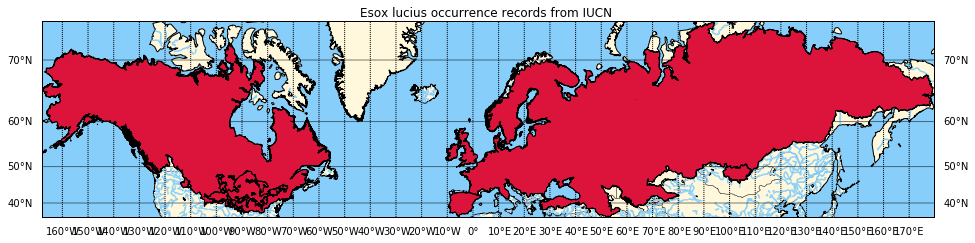

In [50]:
esox_lucius.plot_species_occurrence()

### One with the smallest area

In [51]:
non_extinct_fish.head(1).binomial

1396    Astatotilapia burtoni
Name: binomial, dtype: object

See all the records(areas) for this binomial

In [52]:
non_extinct_fish[non_extinct_fish.binomial=="Astatotilapia burtoni"]

,binomial,category,citation,class_name,compiler,dist_comm,family_nam,genus_name,geometry,id_no,...,presence,seasonal,shape_area,shape_leng,source,species_na,subpop,subspecies,tax_comm,year
1396,Astatotilapia burtoni,LC,IUCN (International Union for Conservation of ...,ACTINOPTERYGII,None,None,CICHLIDAE,Astatotilapia,POLYGON ((29.81538226200007 -5.175785492999978...,60462.0,...,1.0,0.0,0.000122,0.060842,None,burtoni,None,None,None,0.0
1397,Astatotilapia burtoni,LC,None,ACTINOPTERYGII,None,None,CICHLIDAE,Astatotilapia,(POLYGON ((29.30868665900005 -3.32325778499995...,60462.0,...,1.0,0.0,3.060698,24.027768,None,burtoni,None,None,None,0.0
1395,Astatotilapia burtoni,LC,IUCN (International Union for Conservation of ...,ACTINOPTERYGII,None,None,CICHLIDAE,Astatotilapia,(POLYGON ((29.03575778500004 -1.75451999299997...,60462.0,...,1.0,1.0,9.665142,66.983893,None,burtoni,None,None,None,0.0


In [53]:
astatotilapia_burtoni = IUCNSpecies(name_species="Astatotilapia burtoni")

Enabled Shapely speedups for performance.


In [54]:
astatotilapia_burtoni.set_data(non_extinct_fish[non_extinct_fish.binomial=="Astatotilapia burtoni"])

In [55]:
astatotilapia_burtoni.save_shapefile("../data/fish/selection/astatotilapia_burtoni")

Saved data: ../data/fish/selection/astatotilapia_burtoni 


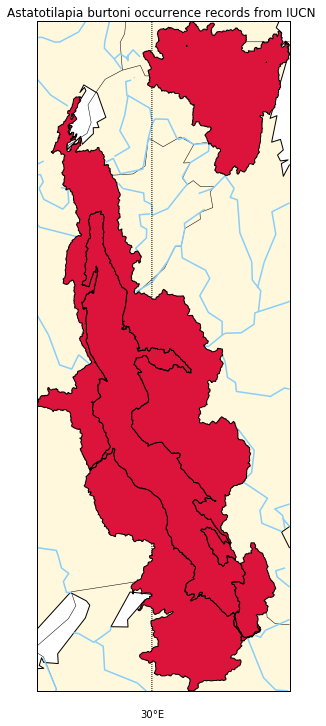

In [56]:
astatotilapia_burtoni.plot_species_occurrence()

This below is just another way of saving the data, i.e., not in a shapefile (which produces multiple files in a separate folder), but a "pickled" data in a single file, compressed. It is usually a lot faster than saving as a shape file, when there is big amounts of data to be saved.

In [57]:
astatotilapia_burtoni.save_data(dir_name="../data/fish/selection/", method="pickle")

Saved data: ../data/fish/selection/Astatotilapia burtoni0.pkl 
Type of data: <class 'geopandas.geodataframe.GeoDataFrame'> 


In [58]:
esox_lucius.save_data(dir_name="../data/fish/selection/", method="pickle")

Saved data: ../data/fish/selection/Esox lucius0.pkl 
Type of data: <class 'geopandas.geodataframe.GeoDataFrame'> 


Since the records are individual shapes, and there could be multiple per species (binomial), let's group them
by the species name, and apply a sum on the shape_area column. This will give us the total area (sum of all polygons) per-species. We want this in order to decide what our "average" species selection will be, for testing the workflow.

In [59]:
species_area_sum = non_extinct_fish.groupby('binomial')['shape_area'].apply(np.sum)

In [60]:
species_area_sum.sort(inplace=True)

/home/daniela/anaconda/envs/biodiversity_py3/lib/python3.4/site-packages/ipykernel/__main__.py:1: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting
  if __name__ == '__main__':


In [61]:
species_area_sum.head(10)

binomial
Stiphodon oatea             0.001221
Pelasgus epiroticus         0.002123
Salvelinus willoughbii      0.002167
Alosa killarnensis          0.002775
Coregonus danneri           0.002878
Stiphodon discotorquatus    0.003033
Salmo nigripinnis           0.003221
Salvelinus grayi            0.003221
Salmo stomachicus           0.003221
Sicyopterus rapa            0.003951
Name: shape_area, dtype: float64

In [62]:
species_area_sum.tail(10)

binomial
Rutilus rutilus         2997.839782
Hypomesus olidus        2999.564823
Gymnocephalus cernua    3057.031980
Cottus confusus         3060.971058
Perca fluviatilis       3422.239269
Phoxinus phoxinus       3521.155232
Pungitius pungitius     3580.720794
Thymallus arcticus      3663.143778
Lota lota               4761.657697
Esox lucius             5449.634304
Name: shape_area, dtype: float64

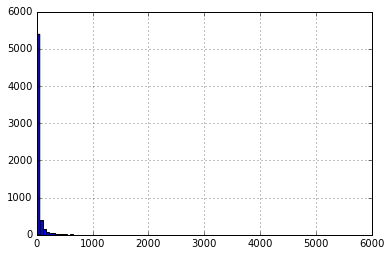

In [63]:
species_area_sum.hist(bins=100)

The distribution of areas (in km^2?) is exponential. The median value is rather low:

In [64]:
species_area_sum.median()

4.7331569142105

In [65]:
np.average(species_area_sum)

45.468180277109752

In [66]:
species_area_sum[(species_area_sum>45) & (species_area_sum<46)]

binomial
Lamprologus mocquardi         45.189511
Barbus guirali                45.277015
Mystus tengara                45.286891
Neolissochilus blanci         45.312671
Barbus wurtzi                 45.349153
Puntius brevis                45.410566
Acrocheilus alutaceus         45.433999
Clupeonella caspia            45.471927
Sicyopterus micrurus          45.491403
Stenogobius ophthalmoporus    45.508970
Belodontichthys truncatus     45.561695
Rita sacerdotum               45.578529
Parioglossus rainfordi        45.623731
Cyclocheilichthys enoplos     45.729648
Cyprinion semiplotum          45.878343
Name: shape_area, dtype: float64

### This below is an interesting "average case" with 3 regions, two of which are rather small. It also has a region extenting all the way into sea/ocean water

In [67]:
non_extinct_fish[non_extinct_fish.binomial=="Acrocheilus alutaceus"]

,binomial,category,citation,class_name,compiler,dist_comm,family_nam,genus_name,geometry,id_no,...,presence,seasonal,shape_area,shape_leng,source,species_na,subpop,subspecies,tax_comm,year
10322,Acrocheilus alutaceus,LC,None,ACTINOPTERYGII,None,None,CYPRINIDAE,Acrocheilus,"(POLYGON ((-118.533976237 49.08130154100007, -...",201940.0,...,1.0,0.0,0.361865,4.537151,None,alutaceus,None,None,None,0.0
10320,Acrocheilus alutaceus,LC,None,ACTINOPTERYGII,None,None,CYPRINIDAE,Acrocheilus,"(POLYGON ((-120.529733955 51.43137715600005, -...",201940.0,...,1.0,1.0,8.364796,37.046891,None,alutaceus,None,None,None,0.0
10321,Acrocheilus alutaceus,LC,NatureServe,ACTINOPTERYGII,"Freshwater Biodiversity Unit, IUCN",None,CYPRINIDAE,Acrocheilus,"(POLYGON ((-124.042233954 46.28038160500006, -...",201940.0,...,1.0,0.0,36.707338,70.318100,Digital Distribution Maps of the Freshwater Fi...,alutaceus,None,None,None,2013.0


In [68]:
acrocheilus_alutaceus = IUCNSpecies(name_species="Acrocheilus alutaceus")

Enabled Shapely speedups for performance.


In [69]:
acrocheilus_alutaceus.set_data(non_extinct_fish[non_extinct_fish.binomial=="Acrocheilus alutaceus"])

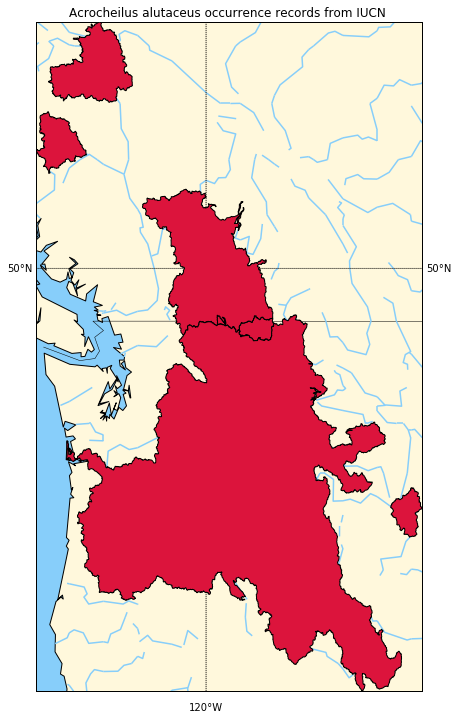

In [70]:
acrocheilus_alutaceus.plot_species_occurrence()

In [71]:
acrocheilus_alutaceus.save_data(dir_name="../data/fish/selection/", method="pickle")

Saved data: ../data/fish/selection/Acrocheilus alutaceus0.pkl 
Type of data: <class 'geopandas.geodataframe.GeoDataFrame'> 


In [72]:
acrocheilus_alutaceus.save_shapefile("../data/fish/selection/acrocheilus_alutaceus")

Saved data: ../data/fish/selection/acrocheilus_alutaceus 


The individual polygons are below. They are also "not valid" geometries, makes them interesting for case study.

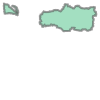

In [73]:
non_extinct_fish.loc[10322].geometry

Ring Self-intersection at or near point -124.46249999999998 53.175000000000068
Ring Self-intersection at or near point -124.46249999999998 53.175000000000068


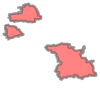

In [74]:
non_extinct_fish.loc[10320].geometry

Ring Self-intersection at or near point -123.34583333399996 45.416666666000026
Ring Self-intersection at or near point -123.34583333399996 45.416666666000026


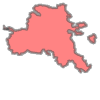

In [75]:
non_extinct_fish.loc[10321].geometry

In [76]:
non_extinct_binomials = non_extinct_fish.binomial.unique().tolist()

Just persist on storage the list of non-extinct binomials we got from IUCN, so we don't have to filter out again.

In [77]:
import pickle
pickle.dump(non_extinct_binomials, open("../data/fish/selection/non_extinct_binomials.pkl","wb"))

In [102]:
non_extinct_binomials.index("Perca fluviatilis")

5665

Let's read Aafke's Excel with lab test data on thermal tolerance for species

In [108]:
thermal_tolerance_df = pd.read_excel("../data/fish/selection/Lethal_temperature_freshwater_fish_July2016.xlsx")
thermal_tolerance_df.head(10)

,Species,CTmax.20,LTmax.20,mean
0,Abudefduf saxatilis,36.7,-,36.70
1,Abudefduf troschelii,36.1,-,36.10
2,Acipenser brevirostrum,33.7,-,33.70
3,Agosia chrysogaster,-,36.4,36.40
4,Alosa pseudoharengus,32.4,-,32.40
5,Ameiurus melas,35.9,-,35.90
6,Ameiurus natalis,35.7,36,35.85
7,Apogon dovii,34.7,-,34.70
8,Apogon maculatus,35,-,35.00
9,Apogon novemfasciatus,35.2,-,35.20


In [111]:
thermal_tolerance_df.columns

Index(['Species ', 'CTmax.20 ', 'LTmax.20 ', 'mean'], dtype='object')

In [114]:
lab_data_list = thermal_tolerance_df['Species '].tolist()

In [122]:
species_with_lat_lon_after_1960 = year_or_eventdate_1960['species'].unique().tolist()

For every species that is in the lab data list, select it if it is also in the IUCN list of non-extinct binomials, AND in the GBIF filtered-out list of species with latitude/longitude information and event year > 1960:

In [124]:
filtered_list = []
for species_name in lab_data_list:
    if species_name.strip() in non_extinct_binomials and species_name.strip() in species_with_lat_lon_after_1960:
        print(species_name)
        filtered_list.append(species_name.strip()) # strip() is just to remove spaces in names

Acipenser brevirostrum 
Agosia chrysogaster 
Alosa pseudoharengus 
Ameiurus melas 
Ameiurus natalis 
Bathygobius fuscus 
Campostoma anomalum 
Carassius auratus 
Catostomus clarkii 
Catostomus commersonii 
Catostomus latipinnis 
Catostomus platyrhynchus 
Catostomus snyderi 
Chasmistes brevirostris 
Cirrhinus mrigala 
Coregonus lavaretus 
Cottus carolinae 
Cottus cognatus 
Cottus hypselurus 
Cottus tallapoosae 
Cyprinella lutrensis 
Cyprinodon elegans 
Cyprinodon macularius 
Cyprinodon rubrofluviatilis 
Cyprinodon variegatus 
Cyprinus carpio 
Ericymba buccata 
Etheostoma blennioides 
Etheostoma caeruleum 
Etheostoma flabellare 
Etheostoma nigrum 
Etheostoma spectabile 
Fundulus notatus 
Fundulus olivaceus 
Fundulus sciadicus 
Fundulus zebrinus 
Gambusia affinis 
Gambusia holbrooki 
Gambusia nobilis 
Gila coerulea 
Gila elegans 
Gila intermedia 
Gila robusta 
Gobio gobio 
Horabagrus brachysoma 
Ictalurus punctatus 
Labeo rohita 
Labidesthes sicculus 
Lepidomeda copei 
Lepidomeda mollispin

Now get the number of point records for this list of lab species (cross-checked with filtered GBIF records)

In [152]:
year_or_eventdate_1960[year_or_eventdate_1960.species.isin(filtered_list)].groupby('species')['species'].apply(lambda x: x.count())

species
Acipenser brevirostrum            121
Agosia chrysogaster               272
Alosa pseudoharengus             7625
Ameiurus melas                   3352
Ameiurus natalis                 5372
Bathygobius fuscus                462
Campostoma anomalum             10821
Carassius auratus                7507
Catostomus clarkii                134
Catostomus commersonii           8414
Catostomus latipinnis             202
Catostomus platyrhynchus          343
Catostomus snyderi                 86
Chasmistes brevirostris           328
Cirrhinus mrigala                  11
Coregonus lavaretus              4889
Cottus carolinae                 3465
Cottus cognatus                  1136
Cottus hypselurus                  75
Cottus tallapoosae                 93
Cyprinella lutrensis             9173
Cyprinodon elegans                 27
Cyprinodon macularius             138
Cyprinodon rubrofluviatilis       430
Cyprinodon variegatus           24626
Cyprinus carpio                 60722
Eric

In [157]:
tmp_series = year_or_eventdate_1960[year_or_eventdate_1960.species.isin(filtered_list)].groupby('species')['species'].apply(lambda x: x.count())

In [182]:
tmp_series[tmp_series>100] # species with more than 50 records

species
Acipenser brevirostrum            121
Agosia chrysogaster               272
Alosa pseudoharengus             7625
Ameiurus melas                   3352
Ameiurus natalis                 5372
Bathygobius fuscus                462
Campostoma anomalum             10821
Carassius auratus                7507
Catostomus clarkii                134
Catostomus commersonii           8414
Catostomus latipinnis             202
Catostomus platyrhynchus          343
Chasmistes brevirostris           328
Coregonus lavaretus              4889
Cottus carolinae                 3465
Cottus cognatus                  1136
Cyprinella lutrensis             9173
Cyprinodon macularius             138
Cyprinodon rubrofluviatilis       430
Cyprinodon variegatus           24626
Cyprinus carpio                 60722
Ericymba buccata                 2542
Etheostoma blennioides           4557
Etheostoma caeruleum             4871
Etheostoma flabellare            4065
Etheostoma nigrum                5165
Ethe

So this is our potential list to choose a representative example from

In [184]:
tmp_series[tmp_series>100].keys()

Index(['Acipenser brevirostrum', 'Agosia chrysogaster', 'Alosa pseudoharengus',
       'Ameiurus melas', 'Ameiurus natalis', 'Bathygobius fuscus',
       'Campostoma anomalum', 'Carassius auratus', 'Catostomus clarkii',
       'Catostomus commersonii', 'Catostomus latipinnis',
       'Catostomus platyrhynchus', 'Chasmistes brevirostris',
       'Coregonus lavaretus', 'Cottus carolinae', 'Cottus cognatus',
       'Cyprinella lutrensis', 'Cyprinodon macularius',
       'Cyprinodon rubrofluviatilis', 'Cyprinodon variegatus',
       'Cyprinus carpio', 'Ericymba buccata', 'Etheostoma blennioides',
       'Etheostoma caeruleum', 'Etheostoma flabellare', 'Etheostoma nigrum',
       'Etheostoma spectabile', 'Fundulus notatus', 'Fundulus olivaceus',
       'Fundulus sciadicus', 'Fundulus zebrinus', 'Gambusia affinis',
       'Gambusia holbrooki', 'Gila robusta', 'Gobio gobio',
       'Ictalurus punctatus', 'Labidesthes sicculus', 'Lepidomeda mollispinis',
       'Lepomis cyanellus', 'Lepomis gi

In [185]:
len(tmp_series[tmp_series>100].keys())

68

In [188]:
len(filtered_list) # so 20 records are out of the original list because of not enough point-records

88

In [194]:
tmp_series[tmp_series>100].sort_values()

species
Lepidomeda mollispinis            103
Acipenser brevirostrum            121
Catostomus clarkii                134
Cyprinodon macularius             138
Fundulus sciadicus                176
Catostomus latipinnis             202
Gila robusta                      224
Notropis girardi                  237
Agosia chrysogaster               272
Chasmistes brevirostris           328
Catostomus platyrhynchus          343
Luxilus zonatus                   402
Cyprinodon rubrofluviatilis       430
Bathygobius fuscus                462
Salvelinus confluentus            521
Notropis lutipinnis               683
Notropis cummingsae               768
Notropis dorsalis                 789
Notropis nubilus                  878
Noturus exilis                    882
Cottus cognatus                  1136
Nocomis biguttatus               1313
Thymallus arcticus               1509
Fundulus zebrinus                1531
Rhinichthys osculus              1764
Ericymba buccata                 2542
Neog

Get the GBIF/IUCN data on the first and the last species in the sorted list. That would be our representative choise for testing workflow.

Enabled Shapely speedups for performance.
Saved data: ../data/fish/selection/lepidomeda_mollispinis 


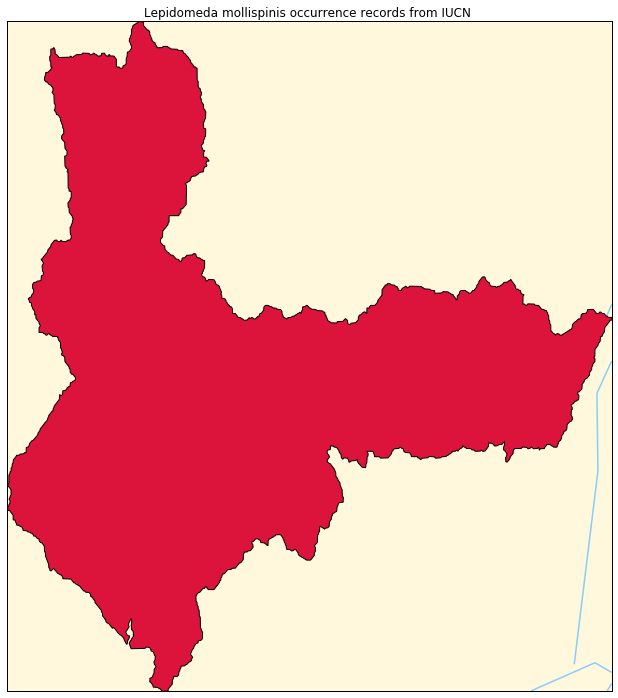

Enabled Shapely speedups for performance.
Loading data from: ../data/fish/selection/gbif/Lepidomeda mollispinis2361895.pkl
Succesfully loaded previously saved data.
Data geometrized: converted into GeoPandas dataframe.
Points with NaN coordinnates ignored. 


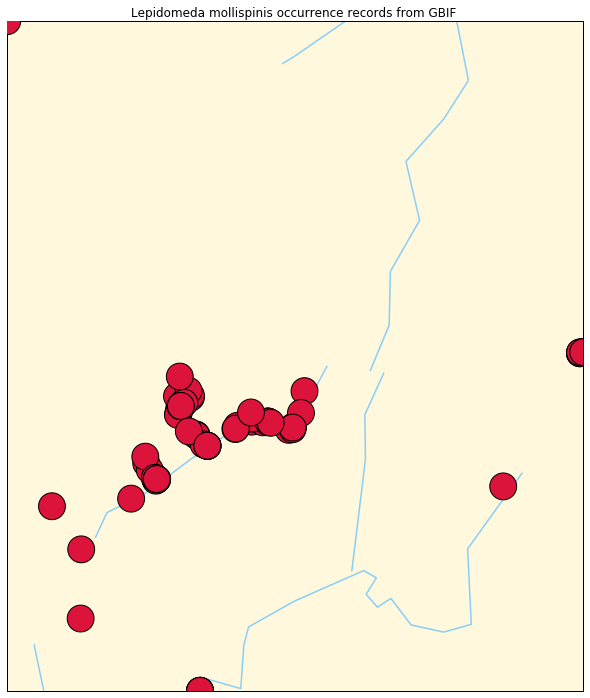

In [203]:
lepidomeda_mollispinis = IUCNSpecies(name_species="Lepidomeda mollispinis")
lepidomeda_mollispinis.set_data(non_extinct_fish[non_extinct_fish.binomial=="Lepidomeda mollispinis"])
lepidomeda_mollispinis.save_shapefile("../data/fish/selection/lepidomeda_mollispinis")
lepidomeda_mollispinis.plot_species_occurrence()

my_species = GBIFSpecies(name_species="Lepidomeda mollispinis")
# download point-records on these species from: https://drive.google.com/open?id=0B9cazFzBtPuCMGlLMnQzb3hsQm8
data = my_species.load_data("../data/fish/selection/Lepidomeda mollispinis2361895.pkl")
my_species.plot_species_occurrence()

Enabled Shapely speedups for performance.
Saved data: ../data/fish/selection/salmo_trutta 


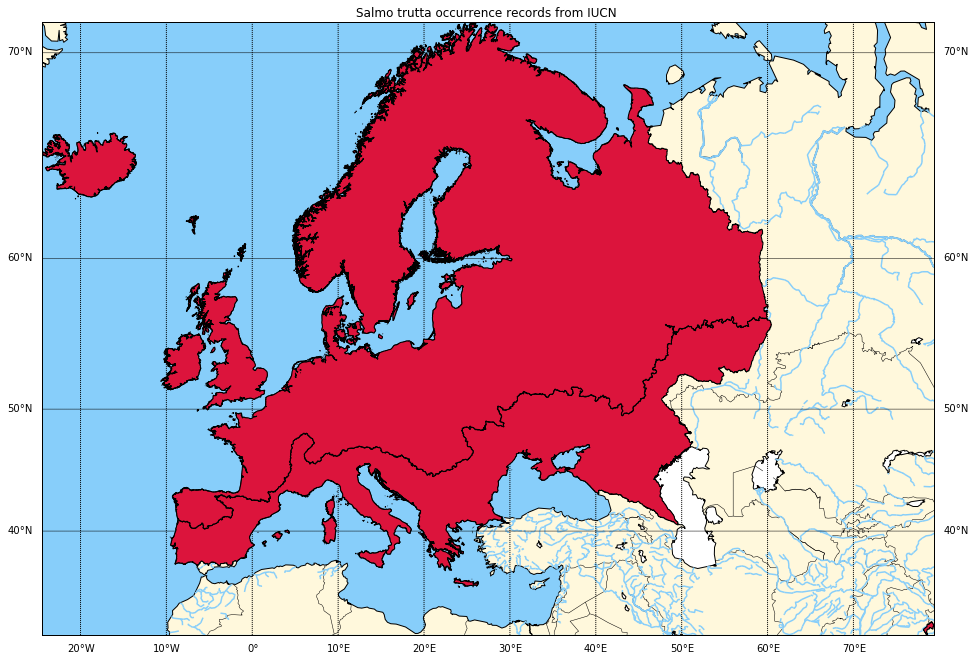

Enabled Shapely speedups for performance.
Loading data from: ../data/fish/selection/gbif/Salmo trutta8215487.pkl
Succesfully loaded previously saved data.
Data geometrized: converted into GeoPandas dataframe.
Points with NaN coordinnates ignored. 


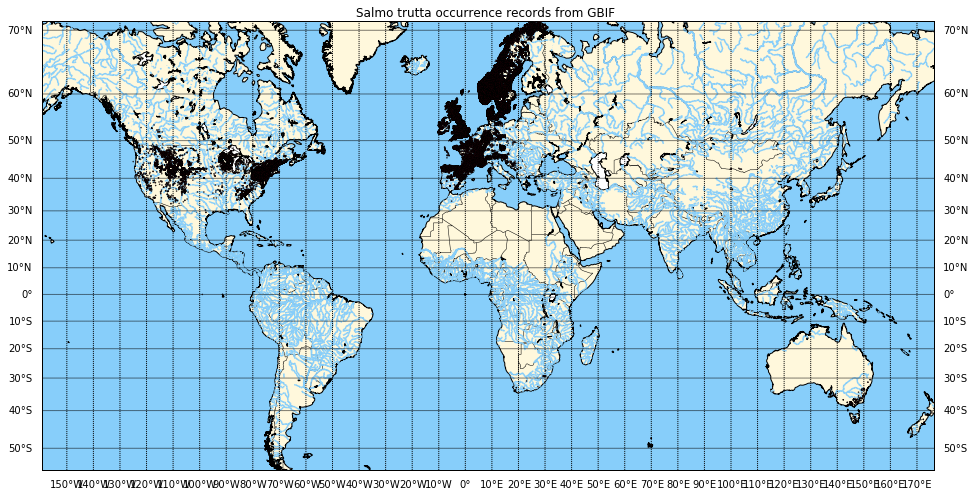

In [204]:
salmo_trutta = IUCNSpecies(name_species="Salmo trutta")
salmo_trutta.set_data(non_extinct_fish[non_extinct_fish.binomial=="Salmo trutta"])
salmo_trutta.save_shapefile("../data/fish/selection/salmo_trutta")
salmo_trutta.plot_species_occurrence()

my_species = GBIFSpecies(name_species="Salmo trutta")
# download point-records on these species from: https://drive.google.com/open?id=0B9cazFzBtPuCWEIySU5oU2ZfT2M 
data = my_species.load_data("../data/fish/selection/Salmo trutta8215487.pkl")
my_species.plot_species_occurrence() # warning: a lot of point-records, may take a while!!

Interesting, lots of point-records outside the expert range? Todo: check again IUCN range.